In [2]:
import seaborn as sn
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [3]:
base_dir = "/dtu/blackhole/1d/155421/sidbench/results"
rows = []
models = ["DeFake", "Rine", "RPTC", "UnivFD"]

In [4]:
for i in models:
    model_dir = os.path.join(base_dir, i, "crop_224_resize_256")

    file_pattern = os.path.join(model_dir, "acc_05_*.txt")
    files = glob.glob(file_pattern)
    #print(files)


    for file_path in files:
        filename = os.path.basename(file_path)
        parts = filename.split("_")

        comp = parts[-2]
        iter = parts[-1].removesuffix(".txt")

        with open(file_path, 'r') as f:
            lines = f.readlines()
            test_data = lines[-1].split()[1:]

            TNR, TPR, ACC = test_data[0], test_data[1], test_data[2]

        #print(i, comp, iter, TNR, TPR, ACC)
        rows.append({
            "Model": i,
            "Comp": comp,
            "Iteration": iter,
            "TNR": TNR,
            "TPR": TPR,
            "ACC": ACC
        })

# Sort data by Model, then comp, then iteration
data = pd.DataFrame(rows)
data = data.drop_duplicates()
data = data.sort_values(by=["Comp"])


In [5]:
rows_ap = []
for i in models:
    model_dir = os.path.join(base_dir, i, "crop_224_resize_256")

    file_pattern = os.path.join(model_dir, "ap_*.txt")
    files = glob.glob(file_pattern)
    #print(files)


    for file_path in files:
        filename = os.path.basename(file_path)
        parts = filename.split("_")

        comp = parts[-2]
        iter = parts[-1].removesuffix(".txt")

        with open(file_path, 'r') as f:
            lines = f.readlines()
            test_data = lines[-1].split()[1:]

        #print(i, comp, iter, TNR, TPR, ACC)
        rows_ap.append({
            "Model": i,
            "Comp": comp,
            "Iteration": iter,
            "Average Precision": test_data[-1]
        })

# Sort data by Model, then comp, then iteration
data_2 = pd.DataFrame(rows_ap)
data_2 = data_2.drop_duplicates()
data_2 = data_2.sort_values(by=["Comp"])


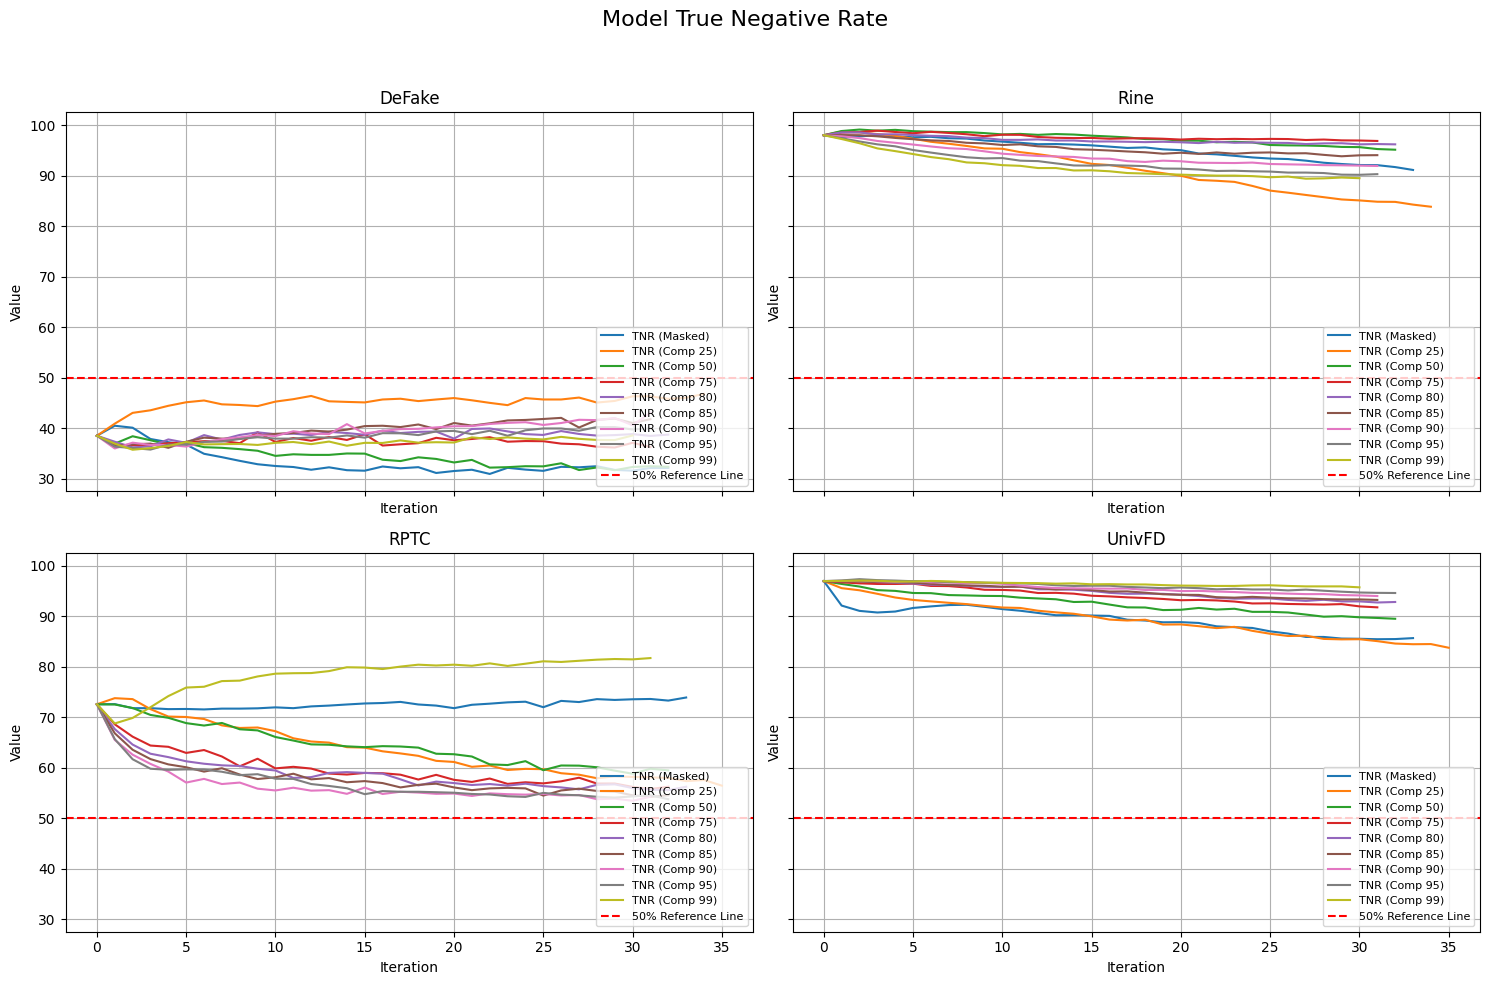

In [6]:
# Make a plot of each model with their respective TNR, TPR, ACC over iteration for each compression level

# Create a figure with 4 subplots, one for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Iterate over models and plot in corresponding subplot
for idx, model in enumerate(models):
    ax = axes[idx]
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})
    
    for comp in model_data["Comp"].unique():
        comp_data = model_data[model_data["Comp"] == comp]
        comp_data = comp_data.sort_values(["Iteration"])
        if comp == "100":
            comp = "Masked"
        else:
            comp = f"Comp {comp}"
        # Plot each metric for this compression level
        ax.plot(comp_data["Iteration"], comp_data["TNR"], label=f"TNR ({comp})", linestyle='-')
        #ax.plot(comp_data["Iteration"], comp_data["TPR"], label=f"TPR (Comp {comp})", linestyle='--')
        #ax.plot(comp_data["Iteration"], comp_data["ACC"], label=f"ACC (Comp {comp})", linestyle='-')

    # Add titles, grid, and labels
    ax.set_title(f"{model}", fontsize=12)
    ax.axhline(y=50, color='r', linestyle='--', label="50% Reference Line")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend(fontsize=8, loc='lower right')

# Add a common title and adjust layout
fig.suptitle("Model True Negative Rate", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


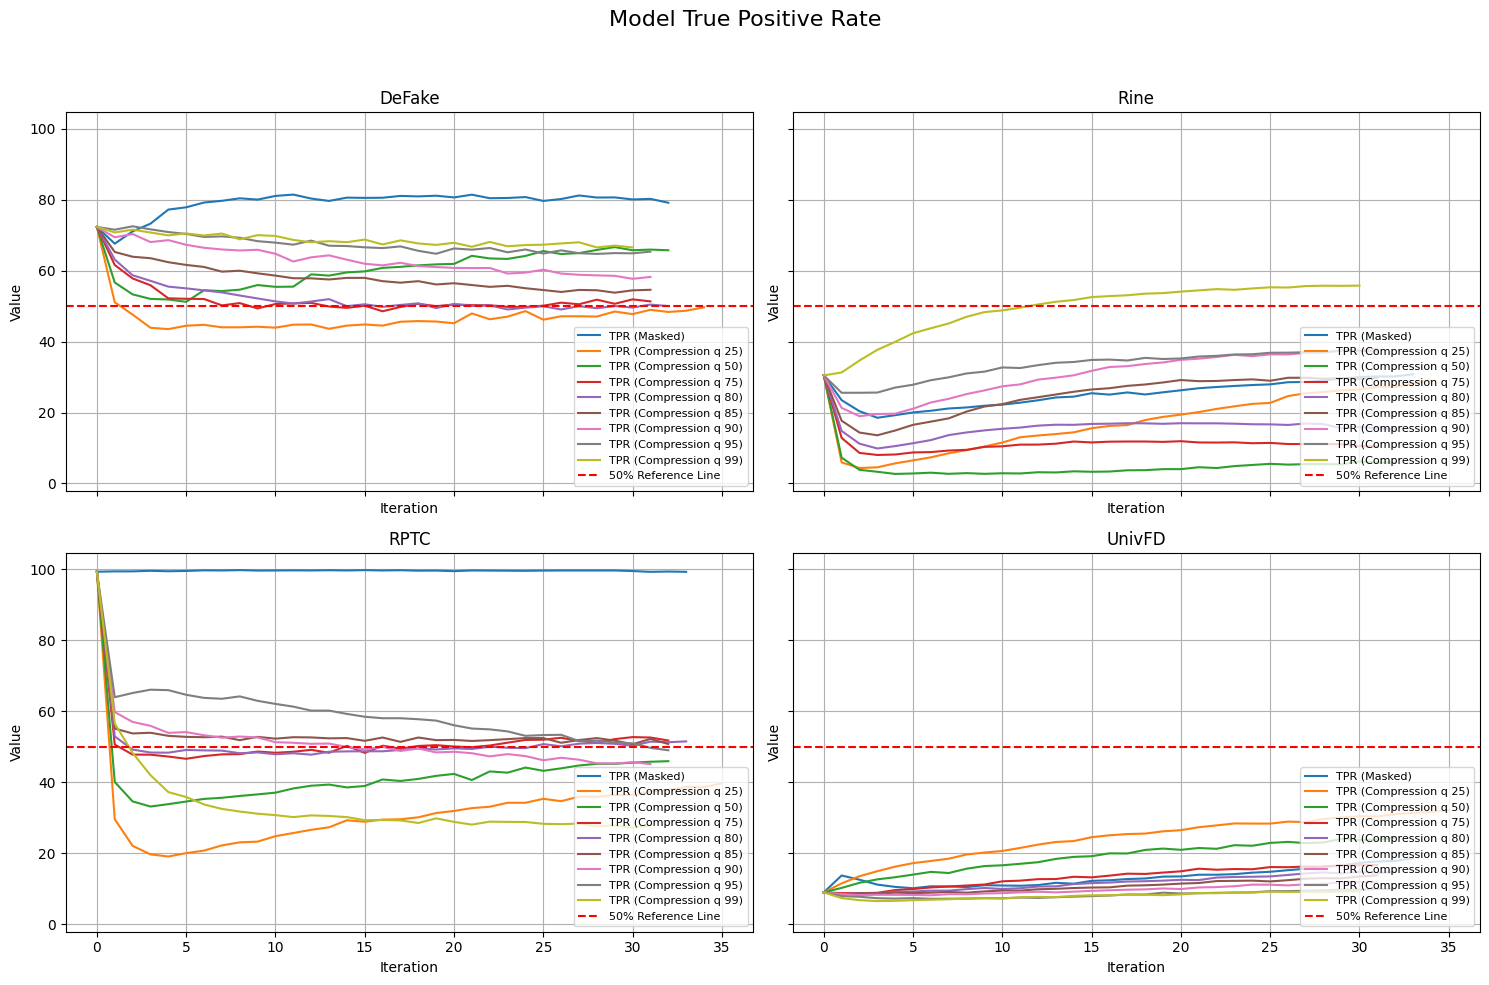

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Iterate over models and plot in corresponding subplot
for idx, model in enumerate(models):
    ax = axes[idx]
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})
    
    for comp in model_data["Comp"].unique():
        comp_data = model_data[model_data["Comp"] == comp]
        comp_data = comp_data.sort_values("Iteration")
        if comp == "100":
            comp = "Masked"
        else:
            comp = f"Compression q {comp}"
        # Plot each metric for this compression level
        #ax.plot(comp_data["Iteration"], comp_data["TNR"], label=f"TNR (Comp {comp})", linestyle='-')
        ax.plot(comp_data["Iteration"], comp_data["TPR"], label=f"TPR ({comp})", linestyle='-')
        #ax.plot(comp_data["Iteration"], comp_data["ACC"], label=f"ACC (Comp {comp})", linestyle='-')

    # Add titles, grid, and labels
    ax.set_title(f"{model}", fontsize=12)
    ax.axhline(y=50, color='r', linestyle='--', label="50% Reference Line")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend(fontsize=8, loc='lower right')

# Add a common title and adjust layout
fig.suptitle("Model True Positive Rate", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

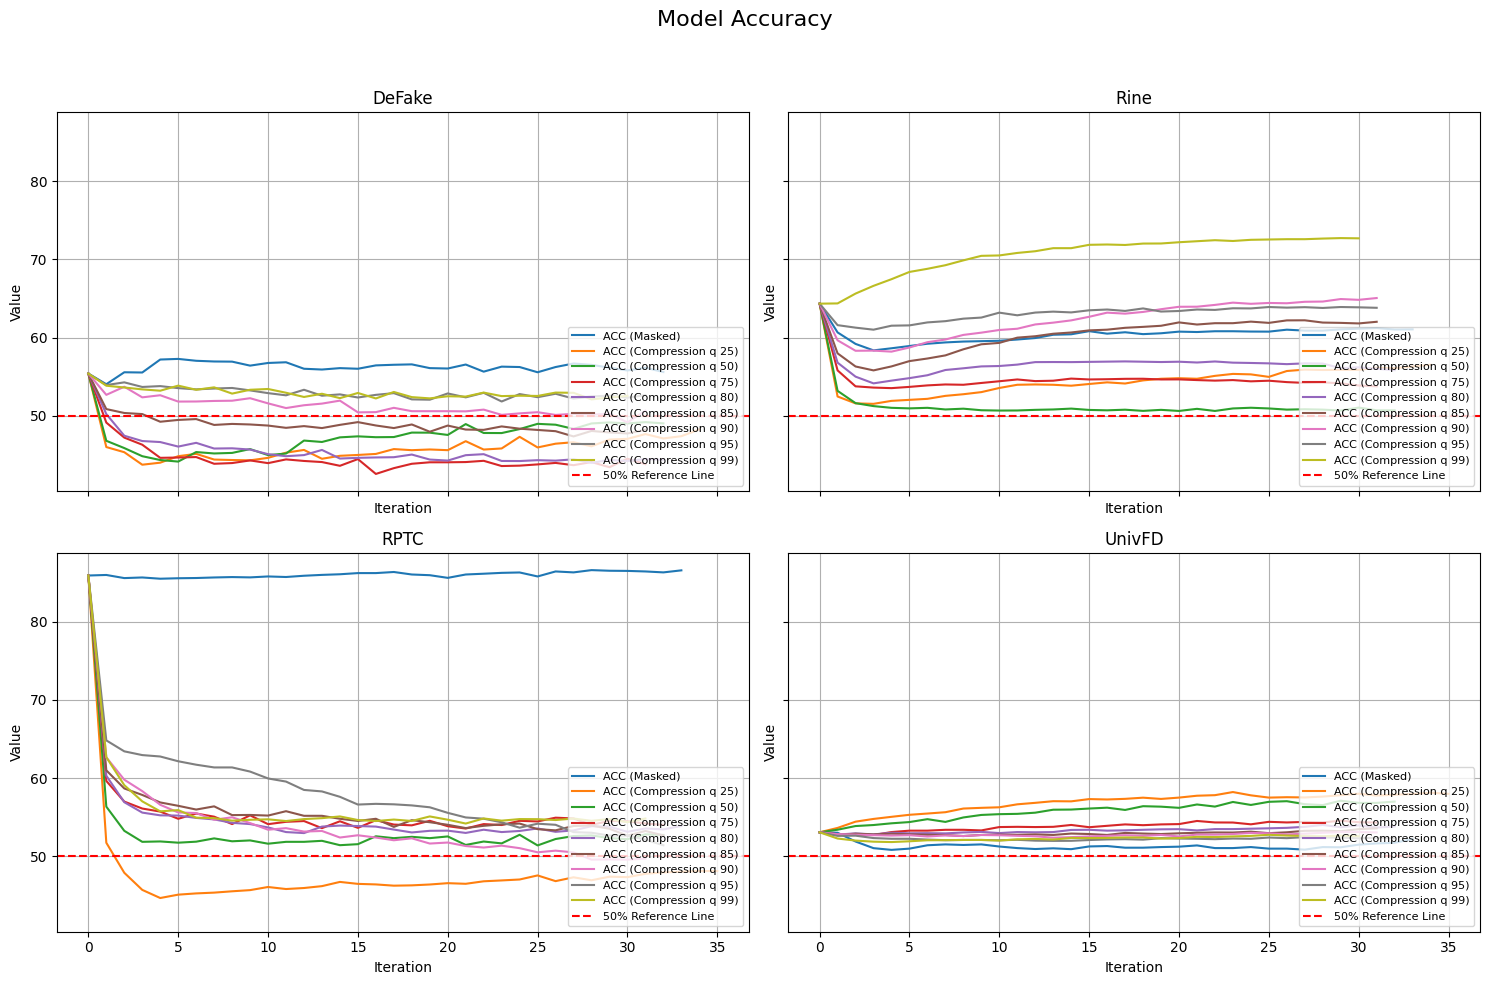

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Iterate over models and plot in corresponding subplot
for idx, model in enumerate(models):
    ax = axes[idx]
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})
    
    for comp in model_data["Comp"].unique():
        comp_data = model_data[model_data["Comp"] == comp]
        comp_data = comp_data.sort_values("Iteration")
        if comp == "100":
            comp = "Masked"
        else:
            comp = f"Compression q {comp}"
        # Plot each metric for this compression level
        #ax.plot(comp_data["Iteration"], comp_data["TNR"], label=f"TNR (Comp {comp})", linestyle='-')
        #ax.plot(comp_data["Iteration"], comp_data["TPR"], label=f"TPR (Comp {comp})", linestyle='--')
        ax.plot(comp_data["Iteration"], comp_data["ACC"], label=f"ACC ({comp})", linestyle='-')

    # Add titles, grid, and labels
    ax.set_title(f"{model}", fontsize=12)
    ax.axhline(y=50, color='r', linestyle='--', label="50% Reference Line")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend(fontsize=8, loc='lower right')

# Add a common title and adjust layout
fig.suptitle("Model Accuracy", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

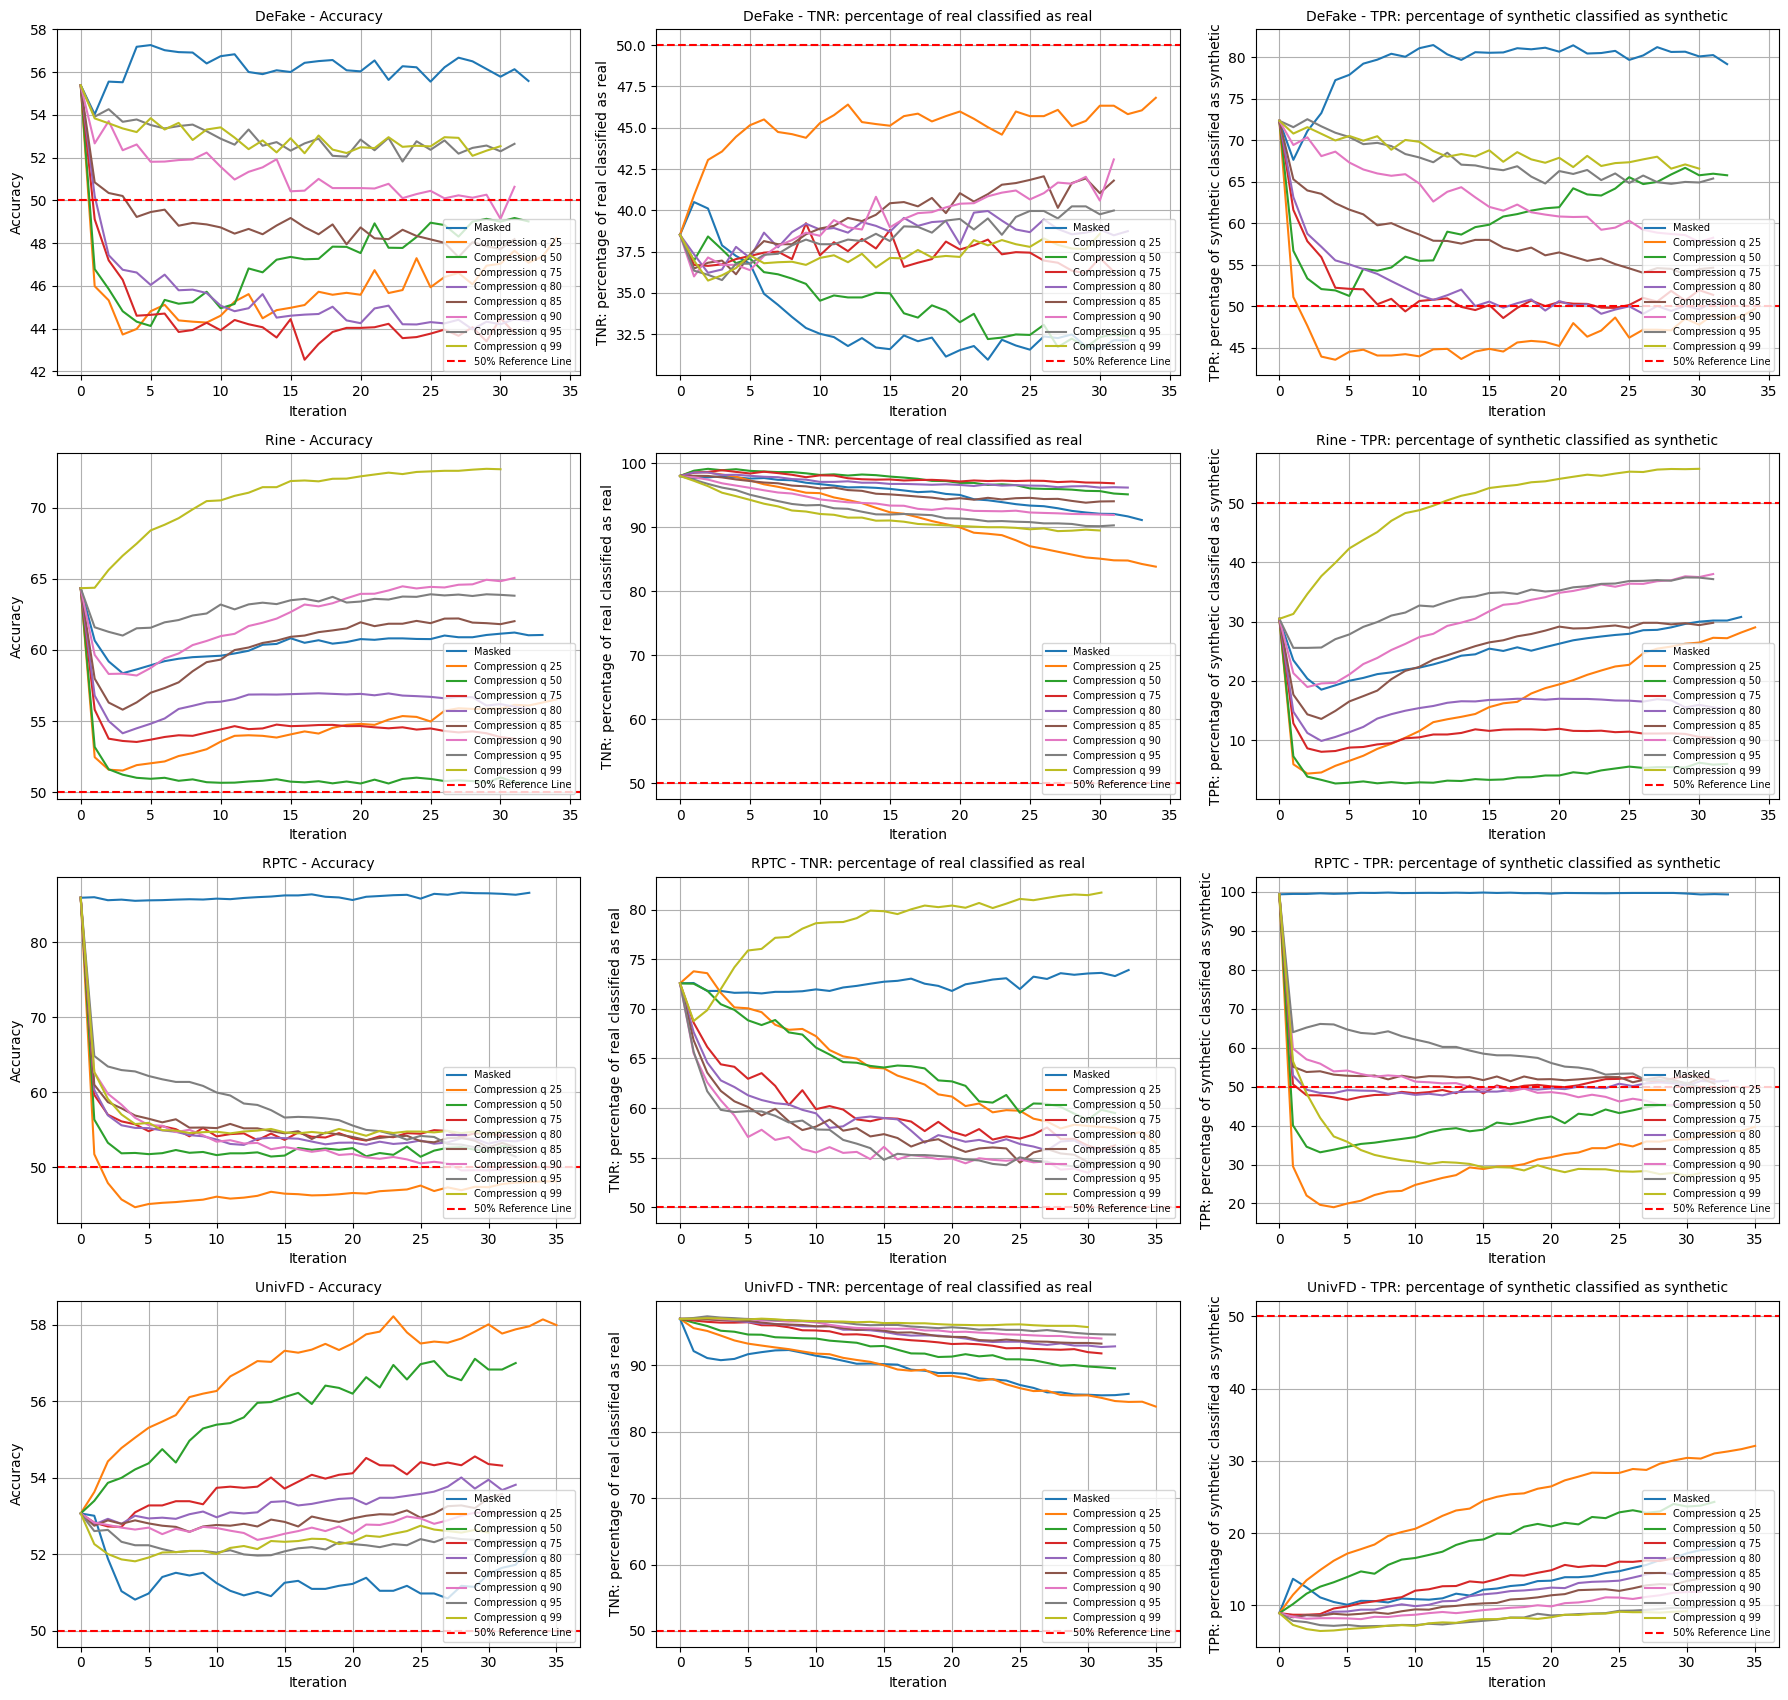

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is already created as a DataFrame

# Define metrics to plot
metrics = [("ACC", "Accuracy"), ("TNR", "TNR: percentage of real classified as real"), ("TPR", "TPR: percentage of synthetic classified as synthetic")]

# Create a main figure
fig, axes = plt.subplots(4, 3, figsize=(18, 18))  # 4 models, 3 spaces (triangular layout)

# Iterate over models and corresponding rows of the grid
for model_idx, model in enumerate(models):
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})
    
    # Access the corresponding row in the axes grid for this model
    ax_acc = axes[model_idx, 0]  # Left plot: ACC
    ax_tnr = axes[model_idx, 1]  # Center plot: TNR
    ax_tpr = axes[model_idx, 2]  # Right plot: TPR

    # Iterate through metrics and plot them
    for ax, (metric, metric_name) in zip([ax_acc, ax_tnr, ax_tpr], metrics):
        for comp in model_data["Comp"].unique():
            comp_data = model_data[model_data["Comp"] == comp]
            comp_data = comp_data.sort_values("Iteration")
            if comp == "100":
                comp = "Masked"
            else:
                comp = f"Compression q {comp}"
            # Plot the specific metric for this compression level
            ax.plot(comp_data["Iteration"], comp_data[metric], label=f"{comp}", linestyle='-')
        
        # Configure axis
        ax.set_title(f"{model} - {metric_name}", fontsize=10)
        ax.axhline(y=50, color='r', linestyle='--', label="50% Reference Line")
        ax.set_xlabel("Iteration")
        ax.set_ylabel(metric_name)
        ax.grid(True)
        ax.legend(fontsize=7, loc='lower right')
        #ax.set_ylim(0, 100)

# Adjust layout and overall title
#fig.suptitle("Model Performance Metrics", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


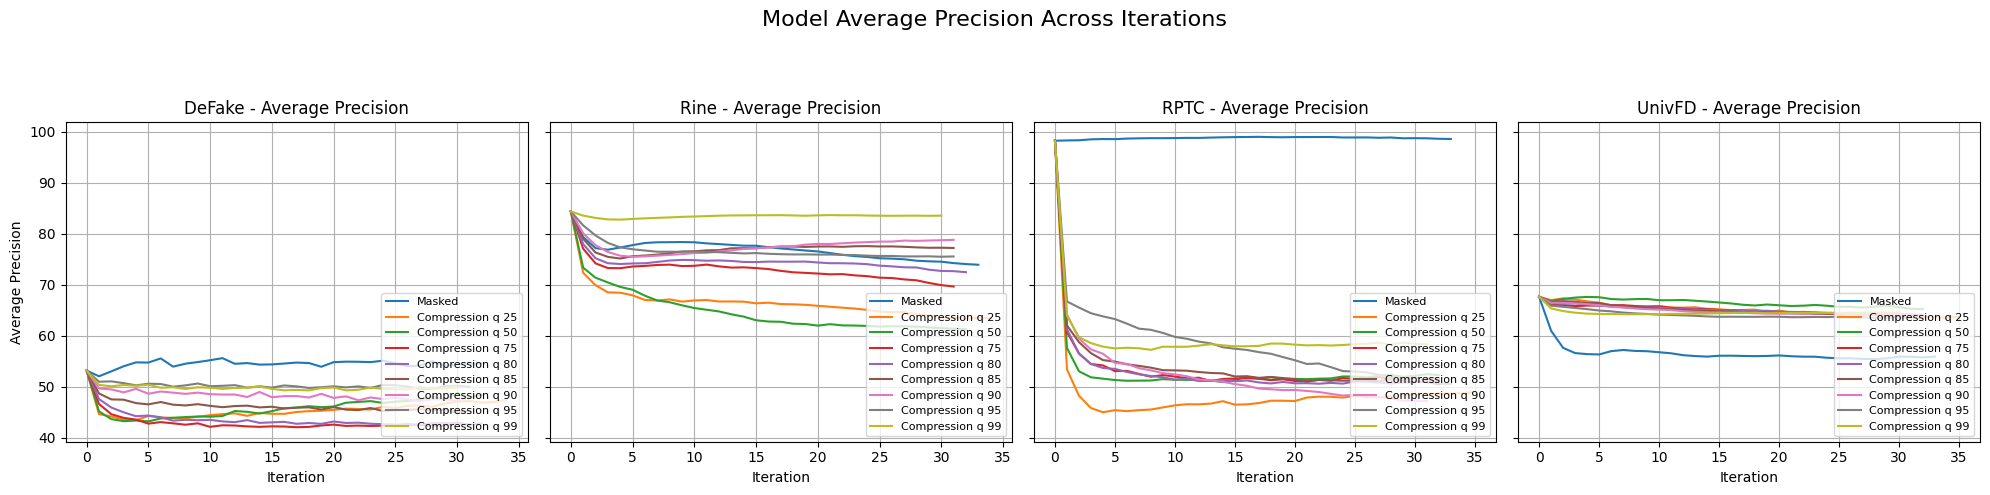

In [10]:
import matplotlib.pyplot as plt

# Assuming 'data_2' is already created as a DataFrame
# Define figure and axes for the row of plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)  # 1 row, 4 plots (one for each model)

# Iterate over models and their corresponding subplot
for model_idx, model in enumerate(models):
    ax = axes[model_idx]
    model_data = data_2[data_2["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "Average Precision": float})

    # Plot Average Precision for each compression level
    for comp in model_data["Comp"].unique():
        comp_data = model_data[model_data["Comp"] == comp]
        comp_data = comp_data.sort_values("Iteration")

        # Handle compression label
        comp_label = "Masked" if comp == "100" else f"Compression q {comp}"

        # Plot Average Precision
        ax.plot(comp_data["Iteration"], comp_data["Average Precision"], label=f"{comp_label}")

    # Configure each subplot
    ax.set_title(f"{model} - Average Precision", fontsize=12)
    ax.set_xlabel("Iteration")
    if model_idx == 0:  # Add Y-axis label only for the first plot
        ax.set_ylabel("Average Precision")
    ax.grid(True)
    ax.legend(fontsize=8, loc='lower right')
    

# Add an overall title and adjust layout
fig.suptitle("Model Average Precision Across Iterations", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout for suptitle
plt.show()


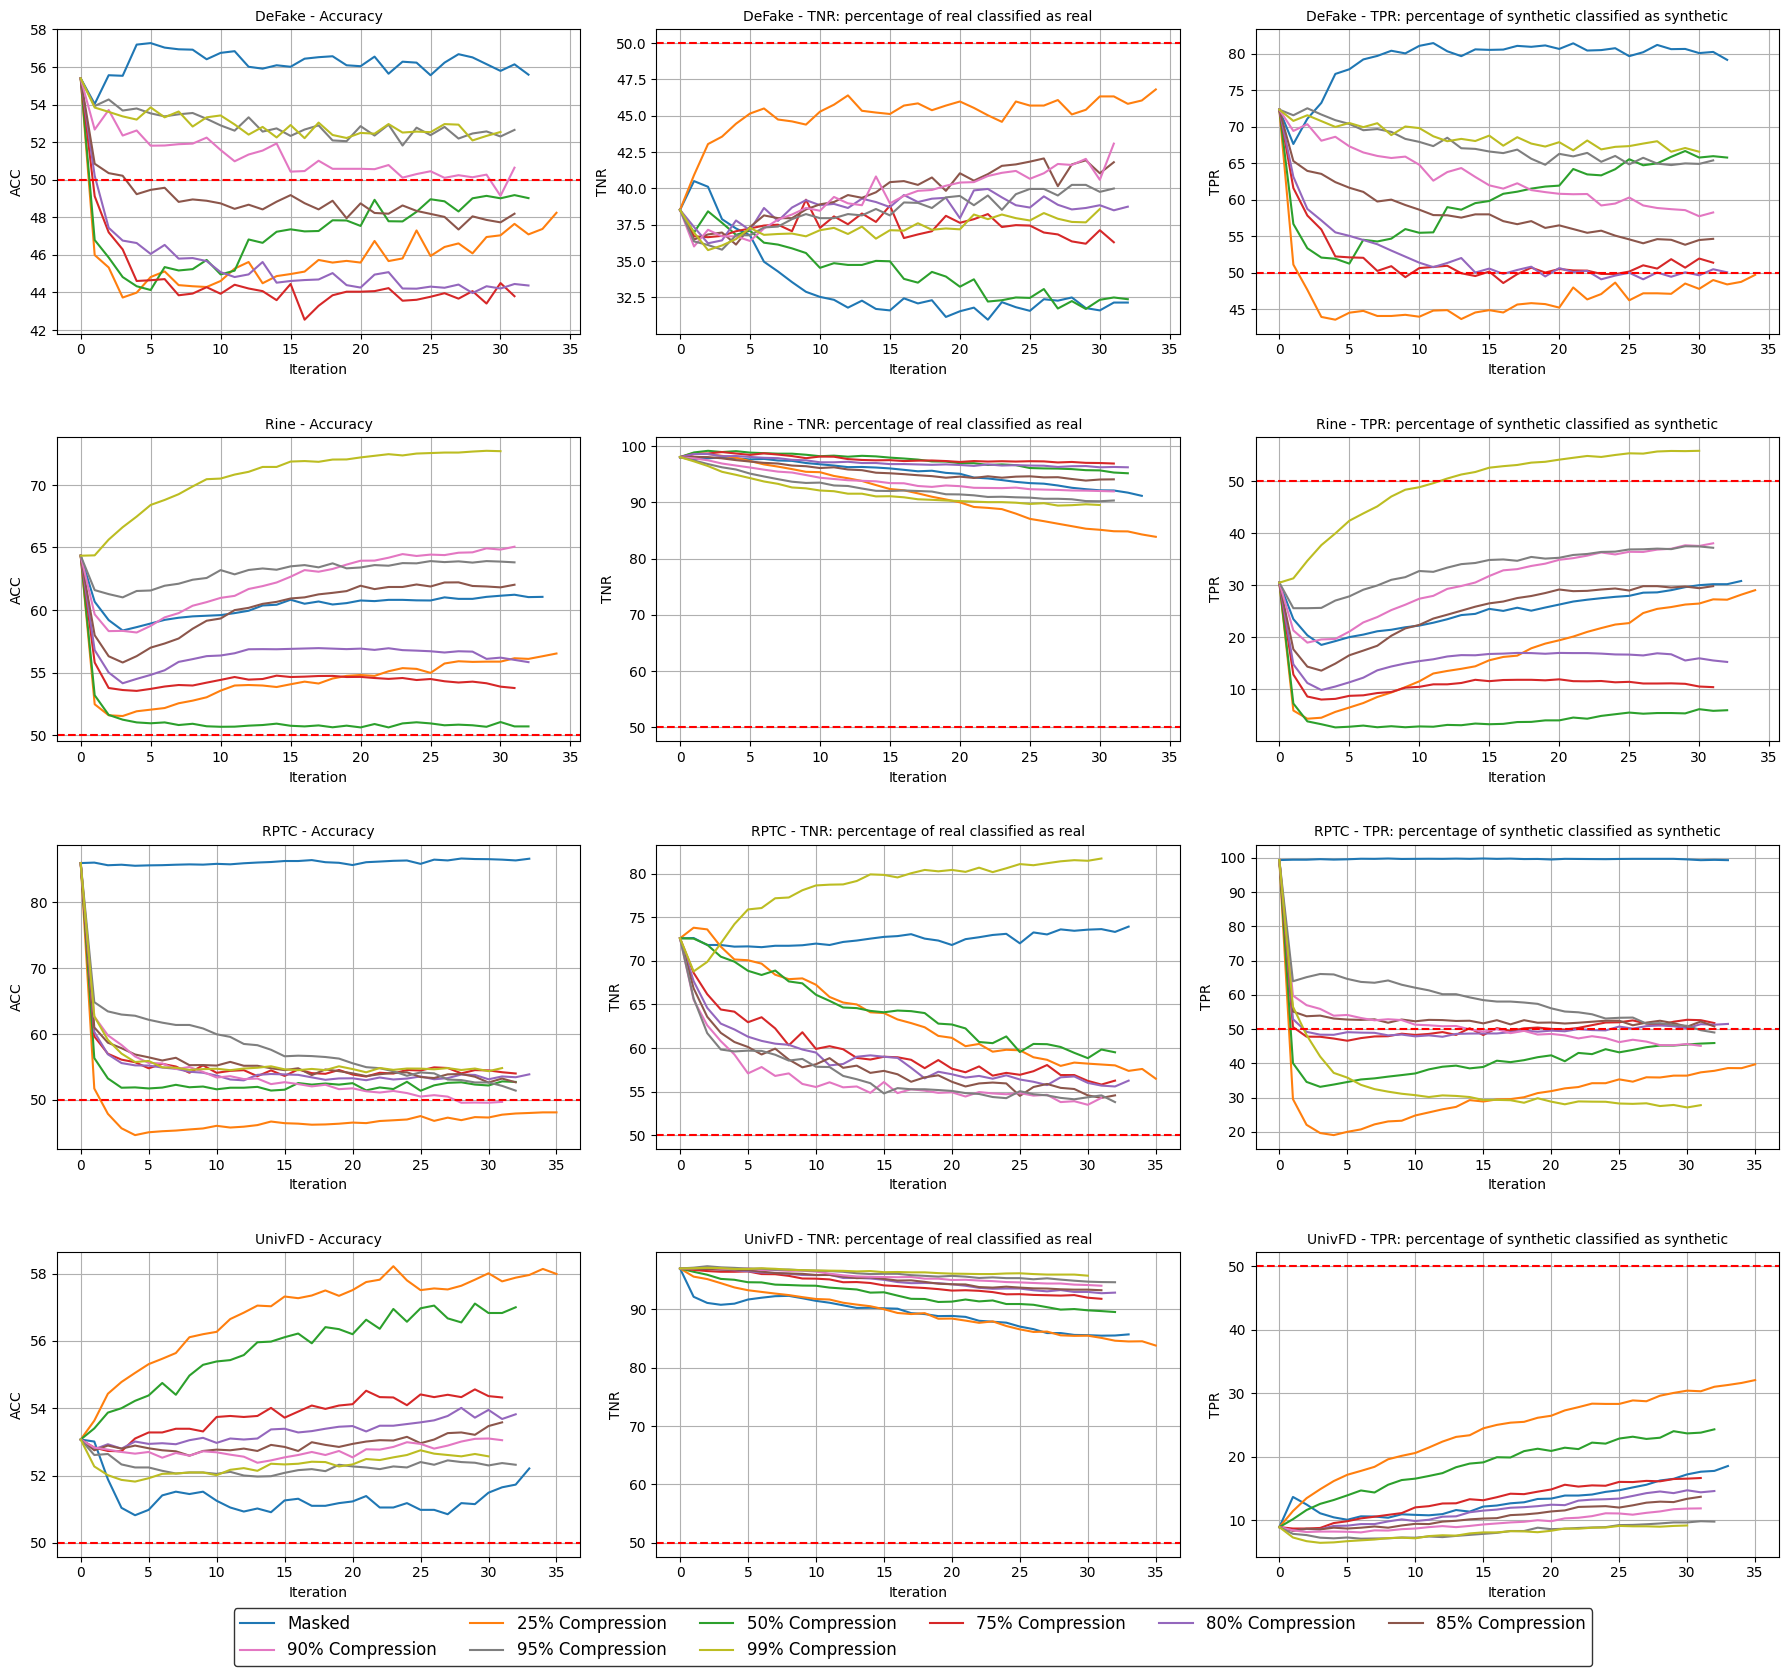

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])


# Define metrics to plot
metrics = [("ACC", "Accuracy"), ("TNR", "TNR: percentage of real classified as real"), ("TPR", "TPR: percentage of synthetic classified as synthetic")]

# Create a main figure
fig, axes = plt.subplots(4, 3, figsize=(18, 18))  # 4 models, 3 spaces (triangular layout)

# Collect unique labels for the legend
unique_comps = data["Comp"].unique()
unique_comps.sort
legend_labels = []
lines = []

# Iterate over models and corresponding rows of the grid
for model_idx, model in enumerate(models):
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})
    
    # Access the corresponding row in the axes grid for this model
    ax_acc = axes[model_idx, 0]  # Left plot: ACC
    ax_tnr = axes[model_idx, 1]  # Center plot: TNR
    ax_tpr = axes[model_idx, 2]  # Right plot: TPR

    # Iterate through metrics and plot them
    for ax, (metric, metric_name) in zip([ax_acc, ax_tnr, ax_tpr], metrics):
        for comp in unique_comps:
            comp_data = model_data[model_data["Comp"] == comp]
            comp_data = comp_data.sort_values("Iteration")
            if comp == "100":
                comp_label = "Masked"
            else:
                comp_label = f"{comp}% Compression"
            
            # Plot the specific metric for this compression level
            line, = ax.plot(comp_data["Iteration"], comp_data[metric], linestyle='-')
            
            # Collect the label for the legend only once
            if comp_label not in legend_labels:
                legend_labels.append(comp_label)
                lines.append(line)
        metr_name = "TNR" if metric == "TNR" else "TPR" if metric == "TPR" else "ACC"
        # Configure axis
        ax.set_title(f"{model} - {metric_name}", fontsize=10)
        ax.axhline(y=50, color='red', linestyle='--')  # Reference line
        ax.set_xlabel("Iteration")
        ax.set_ylabel(metr_name)
        ax.grid(True)


fig.legend(flip(lines,6), flip(legend_labels,6), loc="lower center", fontsize=12, ncol=6, bbox_to_anchor=(0.51, 0.017), frameon=True, edgecolor='black')
# Add a single legend for the whole figure
#fig.legend(lines, legend_labels, loc="lower center", fontsize=10, ncol=9, bbox_to_anchor=(0.51, 0.264), frameon=True, edgecolor='black')
#fig.legend(lines, legend_labels, loc="lower center", fontsize=10, ncol=9, bbox_to_anchor=(0.51, 0.264*1.855), frameon=True, edgecolor='black')
#fig.legend(lines, legend_labels, loc="lower center", fontsize=10, ncol=9, bbox_to_anchor=(0.51, 0.264*2.715), frameon=True, edgecolor='black')
# Adjust layout and overall title
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for the legendblack
plt.subplots_adjust(hspace=0.34)
plt.show()


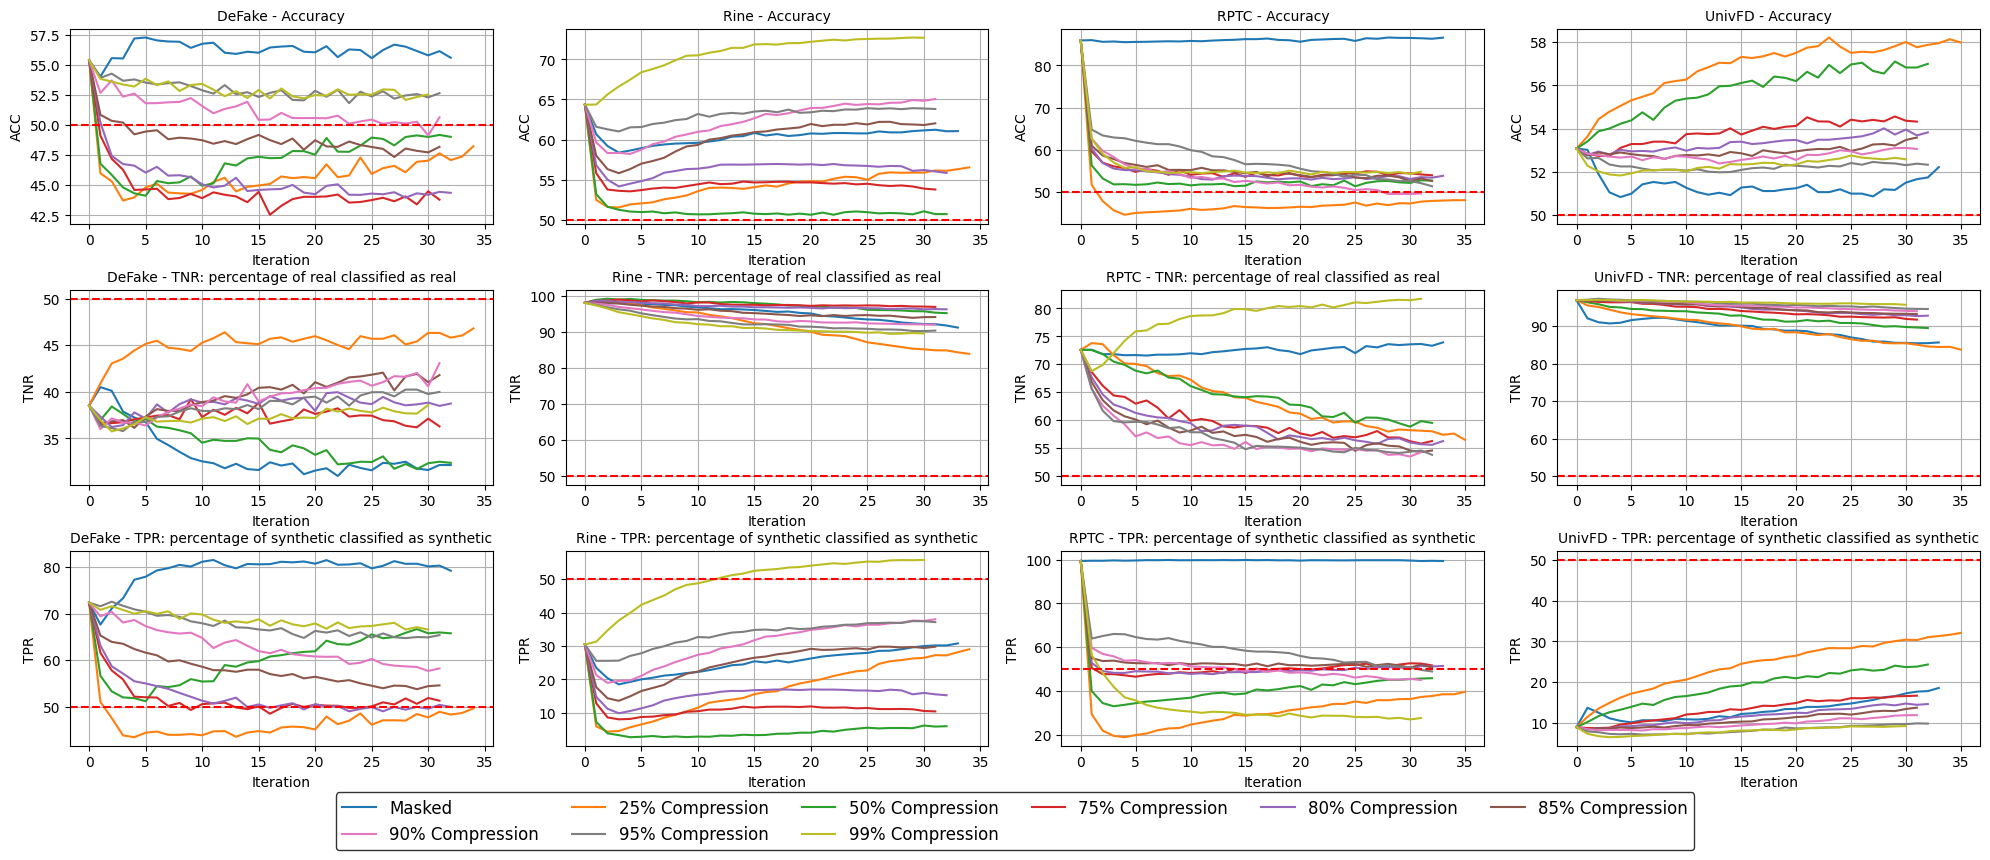

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

# Define metrics to plot
metrics = [
    ("ACC", "Accuracy"),
    ("TNR", "TNR: percentage of real classified as real"),
    ("TPR", "TPR: percentage of synthetic classified as synthetic"),
]

# Create a main figure
fig, axes = plt.subplots(3, 4, figsize=(20, 9))  # 3 metrics, 4 models (column layout)

# Collect unique labels for the legend
unique_comps = data["Comp"].unique()
unique_comps.sort()
legend_labels = []
lines = []

# Iterate over models and corresponding columns of the grid
for model_idx, model in enumerate(models):
    model_data = data[data["Model"] == model]
    model_data = model_data.astype({"Iteration": int, "TNR": float, "TPR": float, "ACC": float})

    # Iterate through metrics and corresponding rows in the grid
    for metric_idx, (metric, metric_name) in enumerate(metrics):
        ax = axes[metric_idx, model_idx]  # Access corresponding subplot

        for comp in unique_comps:
            comp_data = model_data[model_data["Comp"] == comp]
            comp_data = comp_data.sort_values("Iteration")
            comp_label = "Masked" if comp == "100" else f"{comp}% Compression"

            # Plot the specific metric for this compression level
            line, = ax.plot(comp_data["Iteration"], comp_data[metric], linestyle='-')

            # Collect the label for the legend only once
            if comp_label not in legend_labels:
                legend_labels.append(comp_label)
                lines.append(line)

        # Configure axis
        ax.set_title(f"{model} - {metric_name}", fontsize=10)
        ax.axhline(y=50, color='red', linestyle='--')  # Reference line
        ax.set_xlabel("Iteration")
        ax.set_ylabel(metric)
        ax.grid(True)

# Add a single legend for the whole figure
fig.legend(
    flip(lines, 6),
    flip(legend_labels, 6),
    loc="lower center",
    fontsize=12,
    ncol=6,
    bbox_to_anchor=(0.51, -0.01),
    frameon=True,
    edgecolor='black',
)

# Adjust layout and overall title
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for the legend
plt.subplots_adjust(hspace=0.34)
plt.show()
